In [17]:
%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [18]:
import matplotlib.pyplot as plt
import matplotlib.text as mtext

class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle,  **self.text_props)
        handlebox.add_artist(title)
        return title


## Q3.3.d

Ordre de convergence - centré :
- $k=1$ : ordre 1
- $k=2$ : semble d'ordre 2 ! 
- $k=3$ : ordre 1


Ordre de convergence - upwind :
- $k=1$ : ordre 2 plutôt
- $k=2$ : semble d'ordre 3 !
- $k=3$ : ordre 2

In [19]:
df_q33d = pd.read_csv("q33d.csv")

In [44]:
x_name = "hmax"
y_name = "L2_E"
agg_fn_x = min
agg_fn_y = min
df = df_q33d

reduction_value_x = df.groupby(["k", "scheme"]).agg(agg_fn_x)[x_name]
reduction_value_y = df.groupby(["k", "scheme"]).agg(agg_fn_y)[y_name]


df[x_name + "_red"] = df[x_name]  / df.apply(lambda row: reduction_value_x.loc[(row["k"], row["scheme"])],
                                    axis=1)
df[y_name + "_red"] = df[y_name]  / df.apply(lambda row: reduction_value_y.loc[(row["k"], row["scheme"])],
                                    axis=1)

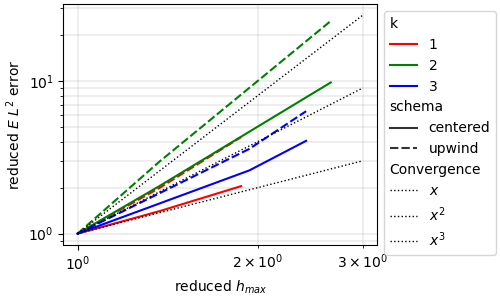

In [60]:
fig, ax = plt.subplots(figsize=(5,3), constrained_layout=True)
sns.lineplot(data=df_q33d, x="hmax_red", y="L2_E_red", hue="k", style="scheme", palette=["r", "g", "b"], ax=ax)

x = np.linspace(1, 3, 10)
y1 = 1.*x
y2 = x**2
y3 = x**3
start = 1
y1 *= start/y1[0]
y2 *= start/y2[0]
y3 *= start/y3[0]

sns.lineplot(x=x, y=y1, label=r"$x$", ax=ax, color="k", linestyle=":", linewidth=1)   # , marker="d", markersize=5)
sns.lineplot(x=x, y=y2, label=r"$x^2$", ax=ax, color="k", linestyle=":", linewidth=1) #, marker="o", markersize=5)
sns.lineplot(x=x, y=y3, label=r"$x^3$", ax=ax, color="k", linestyle=":", linewidth=1) # , marker="v", markersize=5)

h,l = ax.get_legend_handles_labels()
ax.legend(['k'] + h[1:4] + ['schema'] + h[5:7] + ['Convergence'] + h[7:10],
          [' ']  + l[1:4] + [' '] + l[5:7] + [''] + l[7:10],
          handler_map={str: LegendTitle({'fontsize': 10})},
                    bbox_to_anchor=(1, 1))
ax.grid(True, which="both", linewidth=0.3)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"reduced $h_{max}$")
ax.set_ylabel(r"reduced $E$ $L^2$ error");
plt.savefig("qI33d.png", dpi=300)

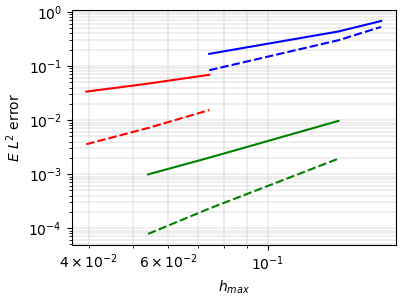

In [61]:
fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
sns.lineplot(data=df_q33d, x="hmax", y="L2_E", hue="k", style="scheme", palette=["r", "g", "b"], ax=ax, legend=False)

h,l = ax.get_legend_handles_labels()
ax.grid(True, which="both", linewidth=0.3)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$h_{max}$")
ax.set_ylabel(r"$E$ $L^2$ error");
plt.savefig("qI33d_not_red.png", dpi=300)

Q3.3.e

TODO : problème sur les valeurs (le recopiage est OK)

In [46]:
df_q33e = pd.read_csv("q33e.csv")

x_name = "sqrt(Nb.Ntri)"
y_name = "L2_E"
agg_fn_x = min
agg_fn_y = max
df = df_q33e

reduction_value_x = df.groupby(["k", "scheme"]).agg(agg_fn_x)[x_name]
reduction_value_y = df.groupby(["k", "scheme"]).agg(agg_fn_y)[y_name]


df[x_name + "_red"] = df[x_name]  / df.apply(lambda row: reduction_value_x.loc[(row["k"], row["scheme"])],
                                    axis=1)
df[y_name + "_red"] = df[y_name]  / df.apply(lambda row: reduction_value_y.loc[(row["k"], row["scheme"])],
                                    axis=1)

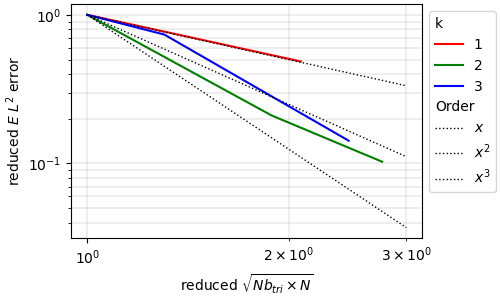

In [47]:
fig, ax = plt.subplots(figsize=(5,3), constrained_layout=True)
sns.lineplot(data=df_q33e, x="sqrt(Nb.Ntri)_red", y="L2_E_red", hue="k", palette=["r", "g", "b"], ax=ax)

x = np.linspace(1, 3, 5)
y1 = 1/x
y2 = 1/x**2
y3 = 1/x**3
start = 1
y1 *= start/y1[0]
y2 *= start/y2[0]
y3 *= start/y3[0]

sns.lineplot(x=x, y=y1, label=r"$x$", ax=ax, color="k", linestyle=":", linewidth=1)
sns.lineplot(x=x, y=y2, label=r"$x^2$", ax=ax, color="k", linestyle=":", linewidth=1)
sns.lineplot(x=x, y=y3, label=r"$x^3$", ax=ax, color="k", linestyle=":", linewidth=1)

h,l = ax.get_legend_handles_labels()
ax.legend(['k'] + h[0:3] + ['Order'] + h[3:7],
          [' ']  + l[0:3] + [' ']  + l[3:7],
          handler_map={str: LegendTitle({'fontsize': 10})},
                    bbox_to_anchor=(1, 1))
ax.grid(True, which="both", linewidth=0.3)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"reduced $\sqrt{Nb_{tri} \times N}$")
ax.set_ylabel(r"reduced $E$ $L^2$ error");
plt.savefig("qI33e.png", dpi=300)

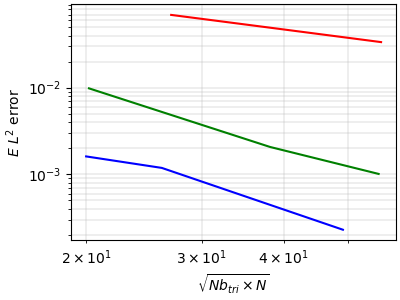

In [54]:
fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
sns.lineplot(data=df_q33e, x="sqrt(Nb.Ntri)", y="L2_E", hue="k", palette=["r", "g", "b"], ax=ax, legend=False)

h,l = ax.get_legend_handles_labels()
# ax.legend(False) 
ax.grid(True, which="both", linewidth=0.3)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$\sqrt{Nb_{tri} \times N}$")
ax.set_ylabel(r"$E$ $L^2$ error");
plt.savefig("qI33e_not_red.png", dpi=300)